<a href="https://colab.research.google.com/github/solobt777/Python_solobt777/blob/main/Week-3-Machine-Learning-Assignments/Boosting%20Exercise/XGBoost_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost


In [ ]:
!brew install libomp

==> Auto-updating Homebrew...
Adjust how often this is run with `$HOMEBREW_AUTO_UPDATE_SECS` or disable with
`$HOMEBREW_NO_AUTO_UPDATE=1`. Hide these hints with `$HOMEBREW_NO_ENV_HINTS=1` (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
addlicense: Scan directories recursively to ensure source files have license headers
airtable-mcp-server: MCP Server for Airtable
anchor: Solana Program Framework
archgw: CLI for Arch Gateway
atomic_queue: C++14 lock-free queues
attempt-cli: CLI for retrying fallible commands
bedtk: Simple toolset for BED files
bom: Utility to generate SPDX-compliant Bill of Materials manifests
cagent: Agent Builder and Runtime by Docker Engineering
changelogen: Generate Beautiful Changelogs using Conventional Commits
chrome-devtools-mcp: Chrome DevTools for coding agents
claude-cmd: Claude Code Commands Manager
claude-hooks: Hook system for Claude Code
codebook-lsp: Code-aware spell checker language server


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
### loading the dataset
df = pd.read_csv('housing.csv')
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
df.head()


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


1. LOADING THE DATA
Data loaded successfully!
Shape: (506, 14)

2. ADDING COLUMN NAMES
Column names added!

First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

3. BASIC DATA EXPLORATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM   

/var/folders/02/pblxvv4x7y94xx9l1x22y14c0000gp/T/ipykernel_83755/2113619506.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.txt", delim_whitespace=True, header=None)


✓ Visualizations saved as 'boston_housing_analysis.png'
✓ Correlation heatmap saved as 'correlation_heatmap.png'

12. EXPORTING PROCESSED DATA
✓ Data saved to 'boston_housing_processed.csv'
✓ Features saved to 'boston_housing_features.csv'
✓ Summary statistics saved to 'boston_housing_summary.csv'

ANALYSIS COMPLETE!

Dataset Overview:
  • Total samples: 506
  • Features: 13
  • Average home price: $22.53k
  • Price range: $5.00k - $50.00k
  • Most correlated feature with price: price_per_room

Files created:
  1. boston_housing_processed.csv
  2. boston_housing_features.csv
  3. boston_housing_summary.csv
  4. boston_housing_analysis.png
  5. correlation_heatmap.png

Ready for machine learning! Use X_train_scaled and y_train for modeling.


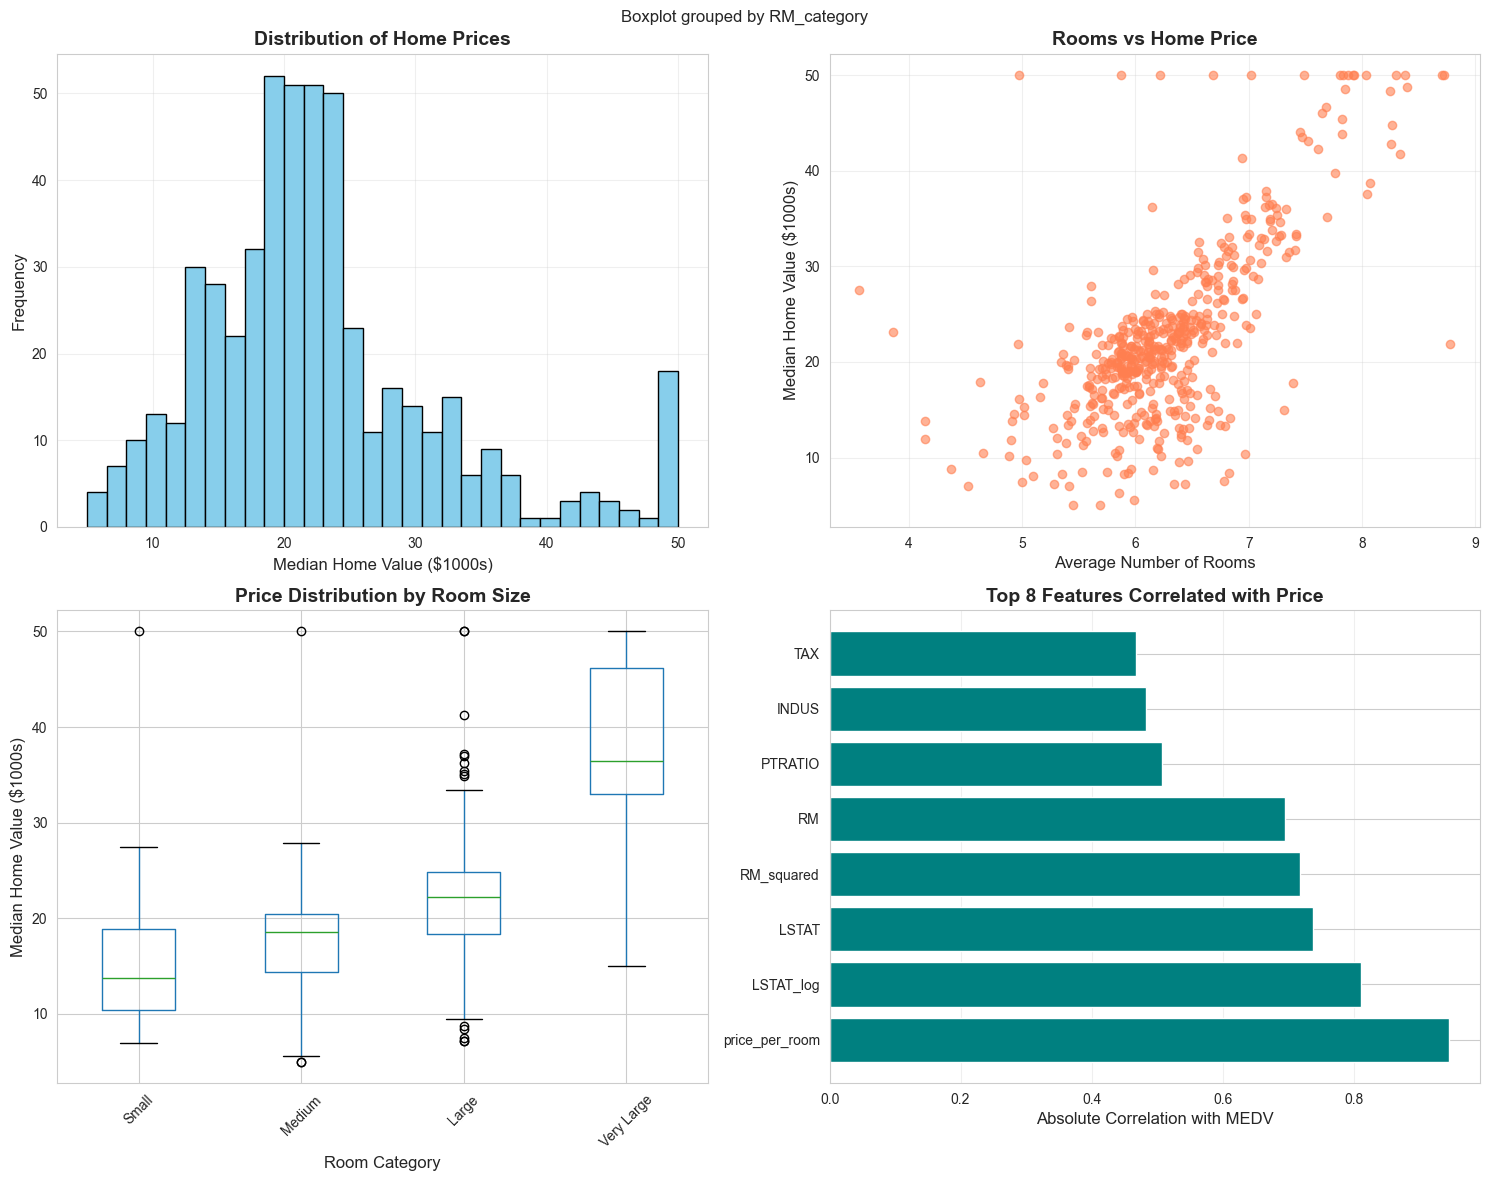

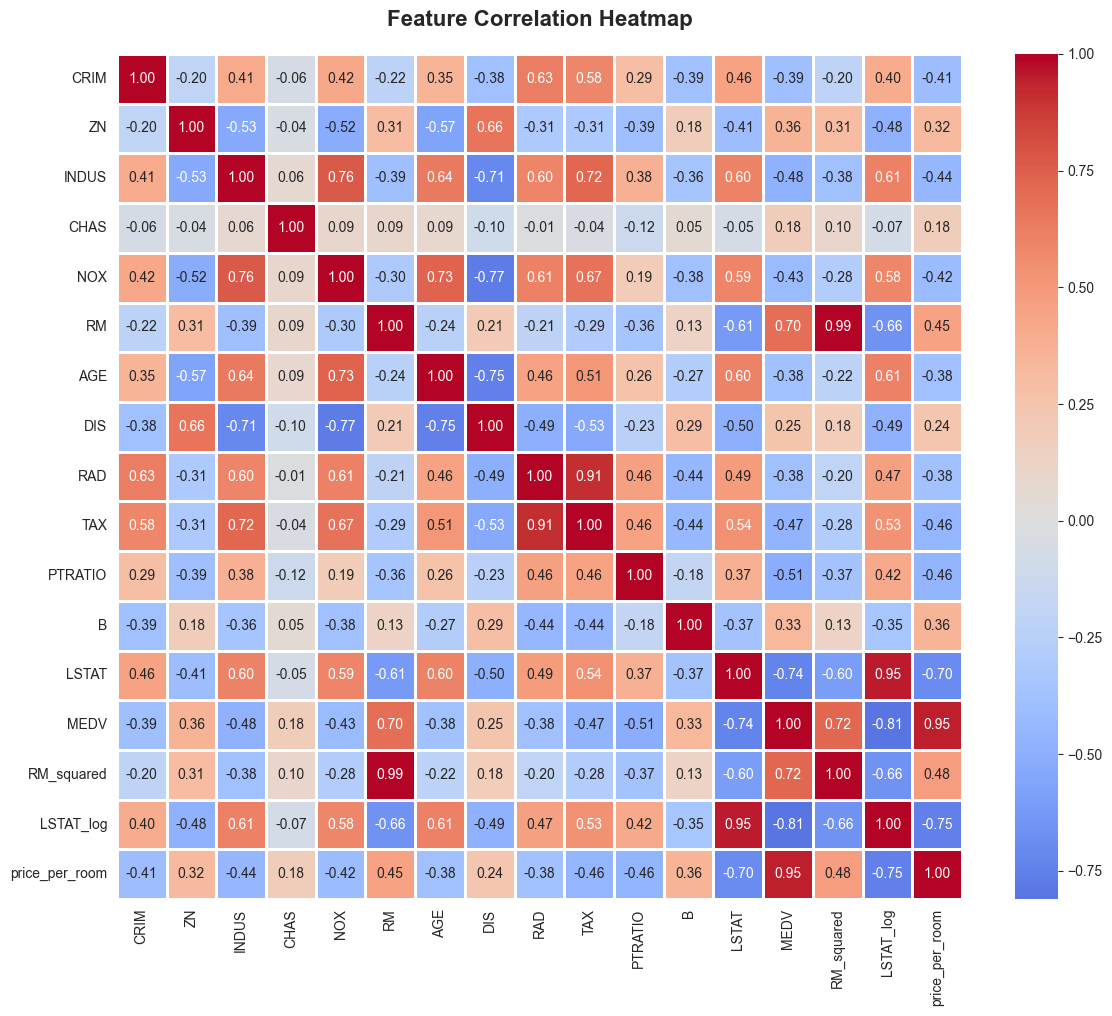

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

# ============================================
# 1. LOADING THE DATA
# ============================================
print("=" * 60)
print("1. LOADING THE DATA")
print("=" * 60)

# If you have a file, use this:
# df = pd.read_csv('boston_housing.txt', delim_whitespace=True, header=None)

# For demonstration, using the data from the document:


# Read the data
df = pd.read_csv("housing.txt", delim_whitespace=True, header=None)

print(f"Data loaded successfully!")
print(f"Shape: {df.shape}")
print()

# ============================================
# 2. ADDING COLUMN NAMES
# ============================================
print("=" * 60)
print("2. ADDING COLUMN NAMES")
print("=" * 60)

column_names = [
    'CRIM',      # Crime rate per capita
    'ZN',        # Proportion of residential land zoned
    'INDUS',     # Proportion of non-retail business acres
    'CHAS',      # Charles River dummy variable
    'NOX',       # Nitric oxides concentration
    'RM',        # Average number of rooms per dwelling
    'AGE',       # Proportion of owner-occupied units built before 1940
    'DIS',       # Weighted distances to employment centers
    'RAD',       # Index of accessibility to highways
    'TAX',       # Property-tax rate per $10,000
    'PTRATIO',   # Pupil-teacher ratio by town
    'B',         # Proportion of Black residents
    'LSTAT',     # % lower status of population
    'MEDV'       # Median value of homes in $1000s (target)
]

df.columns = column_names
print("Column names added!")
print("\nFirst 5 rows:")
print(df.head())
print()

# ============================================
# 3. BASIC DATA EXPLORATION
# ============================================
print("=" * 60)
print("3. BASIC DATA EXPLORATION")
print("=" * 60)

print("\nDataset Info:")
print(df.info())
print("\n" + "-" * 60)

print("\nStatistical Summary:")
print(df.describe())
print("\n" + "-" * 60)

print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "-" * 60)

print("\nData Types:")
print(df.dtypes)
print()

# ============================================
# 4. DATA CLEANING
# ============================================
print("=" * 60)
print("4. DATA CLEANING")
print("=" * 60)

# Convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check for missing values after conversion
missing_count = df.isnull().sum().sum()
print(f"Total missing values: {missing_count}")

# Fill missing values with median (if any)
if missing_count > 0:
    df = df.fillna(df.median())
    print("Missing values filled with median")

print(f"Clean dataset shape: {df.shape}")
print()

# ============================================
# 5. FEATURE ENGINEERING
# ============================================
print("=" * 60)
print("5. FEATURE ENGINEERING")
print("=" * 60)

# Create new features
df['RM_squared'] = df['RM'] ** 2
df['LSTAT_log'] = np.log(df['LSTAT'] + 1)
df['price_per_room'] = df['MEDV'] / df['RM']

# Binning
df['RM_category'] = pd.cut(df['RM'],
                            bins=[0, 5, 6, 7, 10],
                            labels=['Small', 'Medium', 'Large', 'Very Large'])

print("New features created:")
print(df[['RM', 'RM_squared', 'LSTAT', 'LSTAT_log', 'RM_category']].head())
print()

# ============================================
# 6. DATA FILTERING
# ============================================
print("=" * 60)
print("6. DATA FILTERING AND SELECTION")
print("=" * 60)

expensive_homes = df[df['MEDV'] > 30]
riverside_homes = df[df['CHAS'] == 1]
nice_homes = df[(df['RM'] > 6) & (df['MEDV'] > 25) & (df['CRIM'] < 1)]

print(f"Total homes: {len(df)}")
print(f"Expensive homes (>$30k): {len(expensive_homes)}")
print(f"Riverside homes: {len(riverside_homes)}")
print(f"Nice homes (big, expensive, safe): {len(nice_homes)}")
print()

# ============================================
# 7. GROUPING AND AGGREGATION
# ============================================
print("=" * 60)
print("7. GROUPING AND AGGREGATION")
print("=" * 60)

# Group by highway accessibility
grouped = df.groupby('RAD')['MEDV'].agg(['mean', 'median', 'count'])
print("Average price by highway accessibility (RAD):")
print(grouped)
print()

# Multiple aggregations
custom_agg = df.groupby('RAD').agg({
    'MEDV': ['mean', 'std'],
    'RM': 'mean',
    'CRIM': ['min', 'max']
})
print("\nCustom aggregations by RAD:")
print(custom_agg.head())
print()

# ============================================
# 8. CORRELATION ANALYSIS
# ============================================
print("=" * 60)
print("8. CORRELATION ANALYSIS")
print("=" * 60)

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

print("Correlation with target (MEDV):")
print(correlation_matrix['MEDV'].sort_values(ascending=False))
print()

print(f"\nKey correlations:")
print(f"RM (rooms) vs MEDV: {df['RM'].corr(df['MEDV']):.3f}")
print(f"LSTAT (low status %) vs MEDV: {df['LSTAT'].corr(df['MEDV']):.3f}")
print(f"PTRATIO (pupil-teacher ratio) vs MEDV: {df['PTRATIO'].corr(df['MEDV']):.3f}")
print()

# ============================================
# 9. HANDLING OUTLIERS
# ============================================
print("=" * 60)
print("9. HANDLING OUTLIERS")
print("=" * 60)

# IQR method for MEDV
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MEDV'] < lower_bound) | (df['MEDV'] > upper_bound)]
print(f"IQR Method - Outliers in MEDV: {len(outliers)}")
print(f"Lower bound: ${lower_bound:.2f}k, Upper bound: ${upper_bound:.2f}k")

# Remove outliers
df_no_outliers = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]
print(f"Original: {len(df)}, After removing outliers: {len(df_no_outliers)}")
print()

# ============================================
# 10. TRAIN-TEST SPLIT
# ============================================
print("=" * 60)
print("10. PREPARE FOR MACHINE LEARNING")
print("=" * 60)

# Select numeric features only (exclude engineered features and categories)
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = df[feature_cols]
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nFirst 5 samples - Original vs Scaled:")
print("Original:")
print(X_train.head())
print("\nScaled (first 5 rows, first 5 features):")
print(X_train_scaled[:5, :5])
print()

# ============================================
# 11. VISUALIZATION
# ============================================
print("=" * 60)
print("11. CREATING VISUALIZATIONS")
print("=" * 60)

# Set style
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of target variable
axes[0, 0].hist(df['MEDV'], bins=30, edgecolor='black', color='skyblue')
axes[0, 0].set_xlabel('Median Home Value ($1000s)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Home Prices', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Scatter plot - Rooms vs Price
axes[0, 1].scatter(df['RM'], df['MEDV'], alpha=0.6, color='coral')
axes[0, 1].set_xlabel('Average Number of Rooms', fontsize=12)
axes[0, 1].set_ylabel('Median Home Value ($1000s)', fontsize=12)
axes[0, 1].set_title('Rooms vs Home Price', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Box plot - Price by room category
df.boxplot(column='MEDV', by='RM_category', ax=axes[1, 0])
axes[1, 0].set_xlabel('Room Category', fontsize=12)
axes[1, 0].set_ylabel('Median Home Value ($1000s)', fontsize=12)
axes[1, 0].set_title('Price Distribution by Room Size', fontsize=14, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# 4. Top correlations with MEDV
top_corr = correlation_matrix['MEDV'].drop('MEDV').abs().sort_values(ascending=False).head(8)
axes[1, 1].barh(range(len(top_corr)), top_corr.values, color='teal')
axes[1, 1].set_yticks(range(len(top_corr)))
axes[1, 1].set_yticklabels(top_corr.index)
axes[1, 1].set_xlabel('Absolute Correlation with MEDV', fontsize=12)
axes[1, 1].set_title('Top 8 Features Correlated with Price', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('boston_housing_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'boston_housing_analysis.png'")

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Correlation heatmap saved as 'correlation_heatmap.png'")

print()

# ============================================
# 12. EXPORT DATA
# ============================================
print("=" * 60)
print("12. EXPORTING PROCESSED DATA")
print("=" * 60)

# Save to CSV
df.to_csv('boston_housing_processed.csv', index=False)
print("✓ Data saved to 'boston_housing_processed.csv'")

# Save selected features
df[feature_cols + ['MEDV']].to_csv('boston_housing_features.csv', index=False)
print("✓ Features saved to 'boston_housing_features.csv'")

# Save summary statistics
summary = df.describe()
summary.to_csv('boston_housing_summary.csv')
print("✓ Summary statistics saved to 'boston_housing_summary.csv'")

print()
print("=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)
print(f"\nDataset Overview:")
print(f"  • Total samples: {len(df)}")
print(f"  • Features: {len(feature_cols)}")
print(f"  • Average home price: ${df['MEDV'].mean():.2f}k")
print(f"  • Price range: ${df['MEDV'].min():.2f}k - ${df['MEDV'].max():.2f}k")
print(f"  • Most correlated feature with price: {correlation_matrix['MEDV'].drop('MEDV').abs().idxmax()}")
print()
print("Files created:")
print("  1. boston_housing_processed.csv")
print("  2. boston_housing_features.csv")
print("  3. boston_housing_summary.csv")
print("  4. boston_housing_analysis.png")
print("  5. correlation_heatmap.png")
print()
print("Ready for machine learning! Use X_train_scaled and y_train for modeling.")

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_squared,LSTAT_log,price_per_room,RM_category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,43.230625,1.788421,3.650190,Large
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,41.229241,2.316488,3.363962,Large
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,51.624225,1.615420,4.829506,Very Large
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,48.972004,1.371181,4.772792,Large
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,51.079609,1.845300,5.065062,Very Large
